# non_centered_eight example

In [1]:
# Loading libraries
import arviz as az
import pymc3 as pm
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
draws = 500
chains = 4

J = 8
y = np.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0])
sigma = np.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0])
schools = np.array(
    [
        "Choate",
        "Deerfield",
        "Phillips Andover",
        "Phillips Exeter",
        "Hotchkiss",
        "Lawrenceville",
        "St. Paul's",
        "Mt. Hermon",
    ]
)

In [3]:
with pm.Model() as non_centered_eight:
    mu = pm.Normal("mu", mu=0, sd=5)
    tau = pm.HalfCauchy("tau", beta=5)
    theta_tilde = pm.Normal("theta_t", mu=0, sd=1, shape=J)
    theta = pm.Normal("theta", mu=mu, sd=tau, shape=J)
    obs = pm.Normal("obs", mu=theta, sd=sigma, observed=y)

    prior = pm.sample_prior_predictive()
    non_centered_eight_trace = pm.sample(draws, chains=chains)
    posterior_predictive = pm.sample_posterior_predictive(non_centered_eight_trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, theta_t, tau, mu]
Sampling 4 chains, 54 divergences: 100%|███████████████████████████████████████| 4000/4000 [00:08<00:00, 452.69draws/s]
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
There were 21 divergences after tuning. Increase `target_accept` or reparameterize.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
100%|████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 2195.38it/s]


In [11]:
data = az.from_pymc3(
    trace=non_centered_eight_trace,
    prior=prior,
    posterior_predictive=posterior_predictive,
    model=non_centered_eight,
    coords={"school": schools},
    dims={"theta": ["school"], "obs": ["school"], "theta_t": ["school"]},
)

data

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> prior
	> prior_predictive
	> observed_data

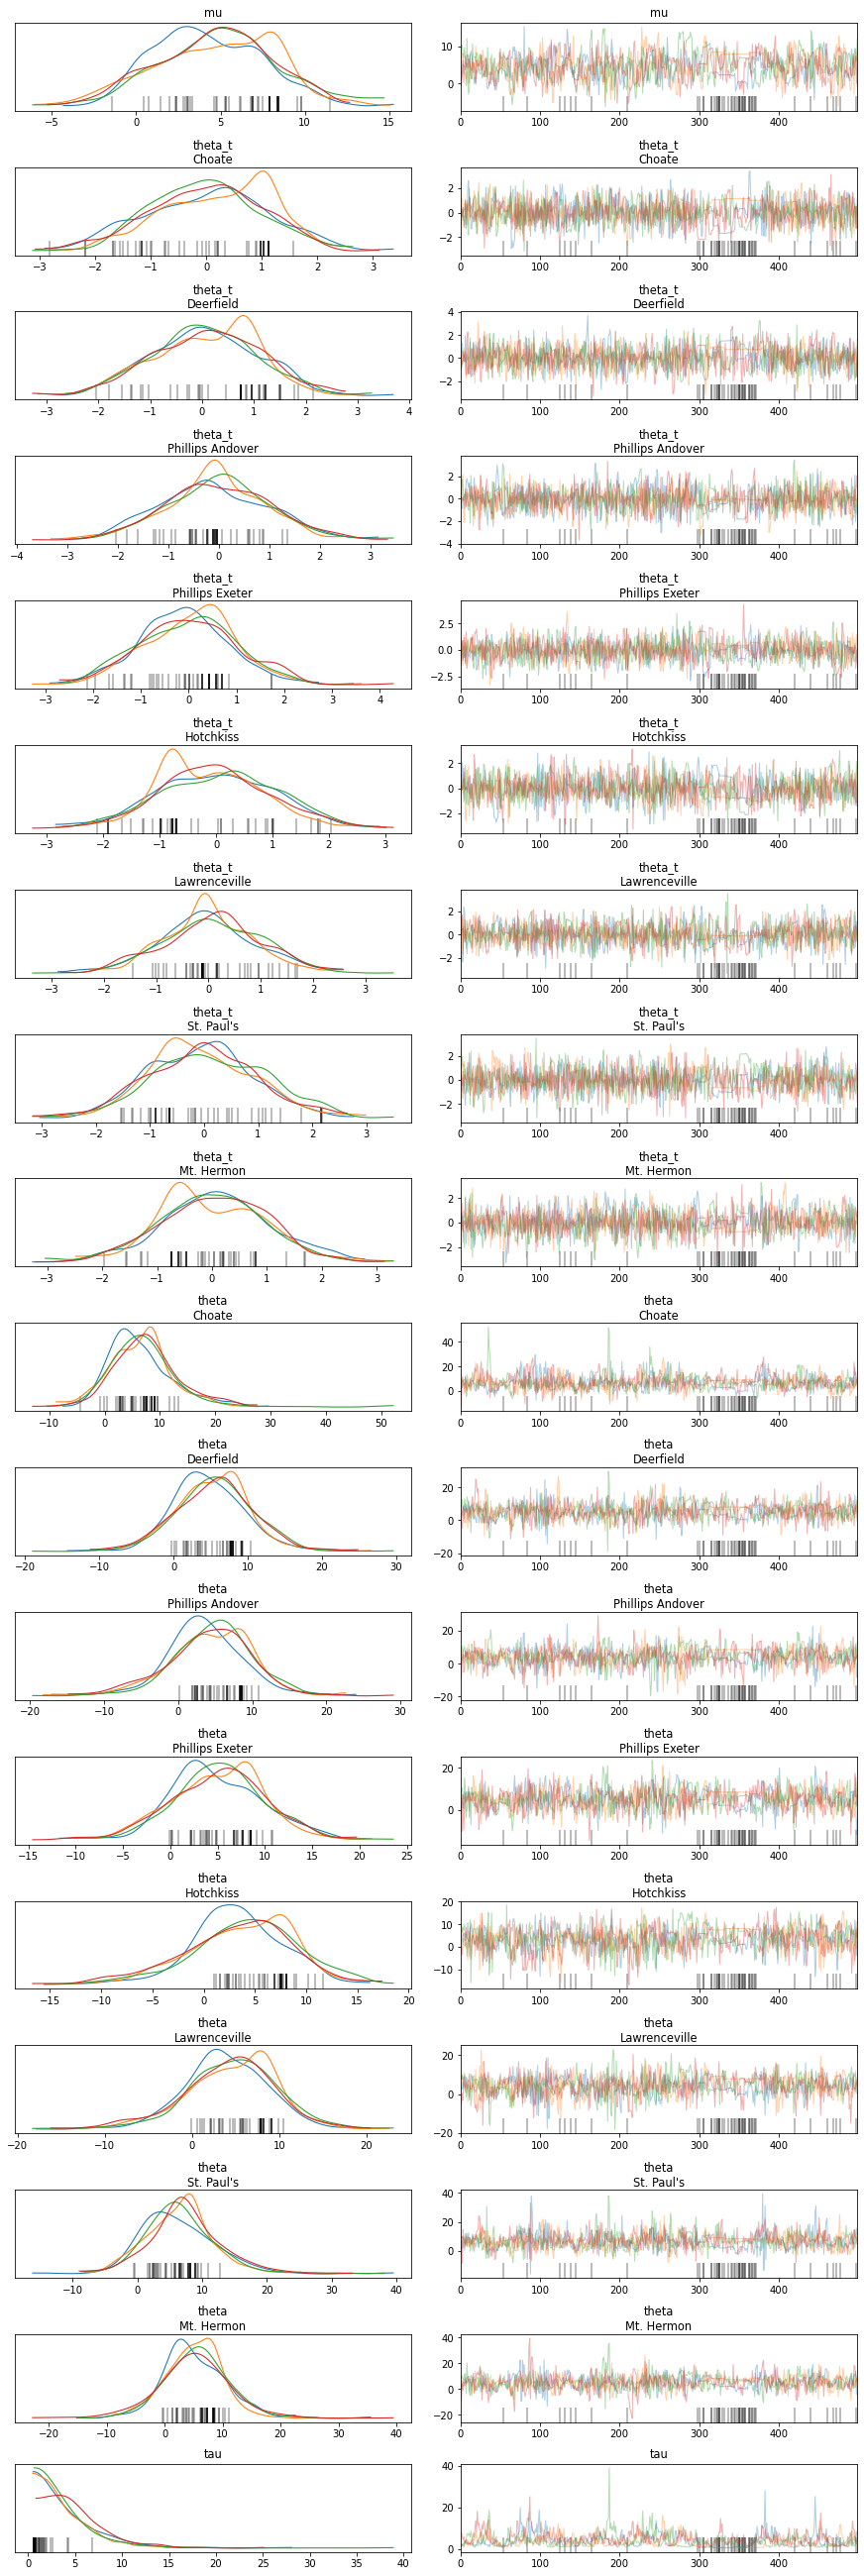

In [5]:
az.plot_trace(data);

In [6]:
# Storing the model to .nc format
az.to_netcdf(data = data, filename = 'non_centered_eight.nc')

'non_centered_eight.nc'

### Loading data previously saved "non_centered_eight" data for comparison

In [7]:
idata = az.load_arviz_data("non_centered_eight")
idata

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> prior
	> observed_data

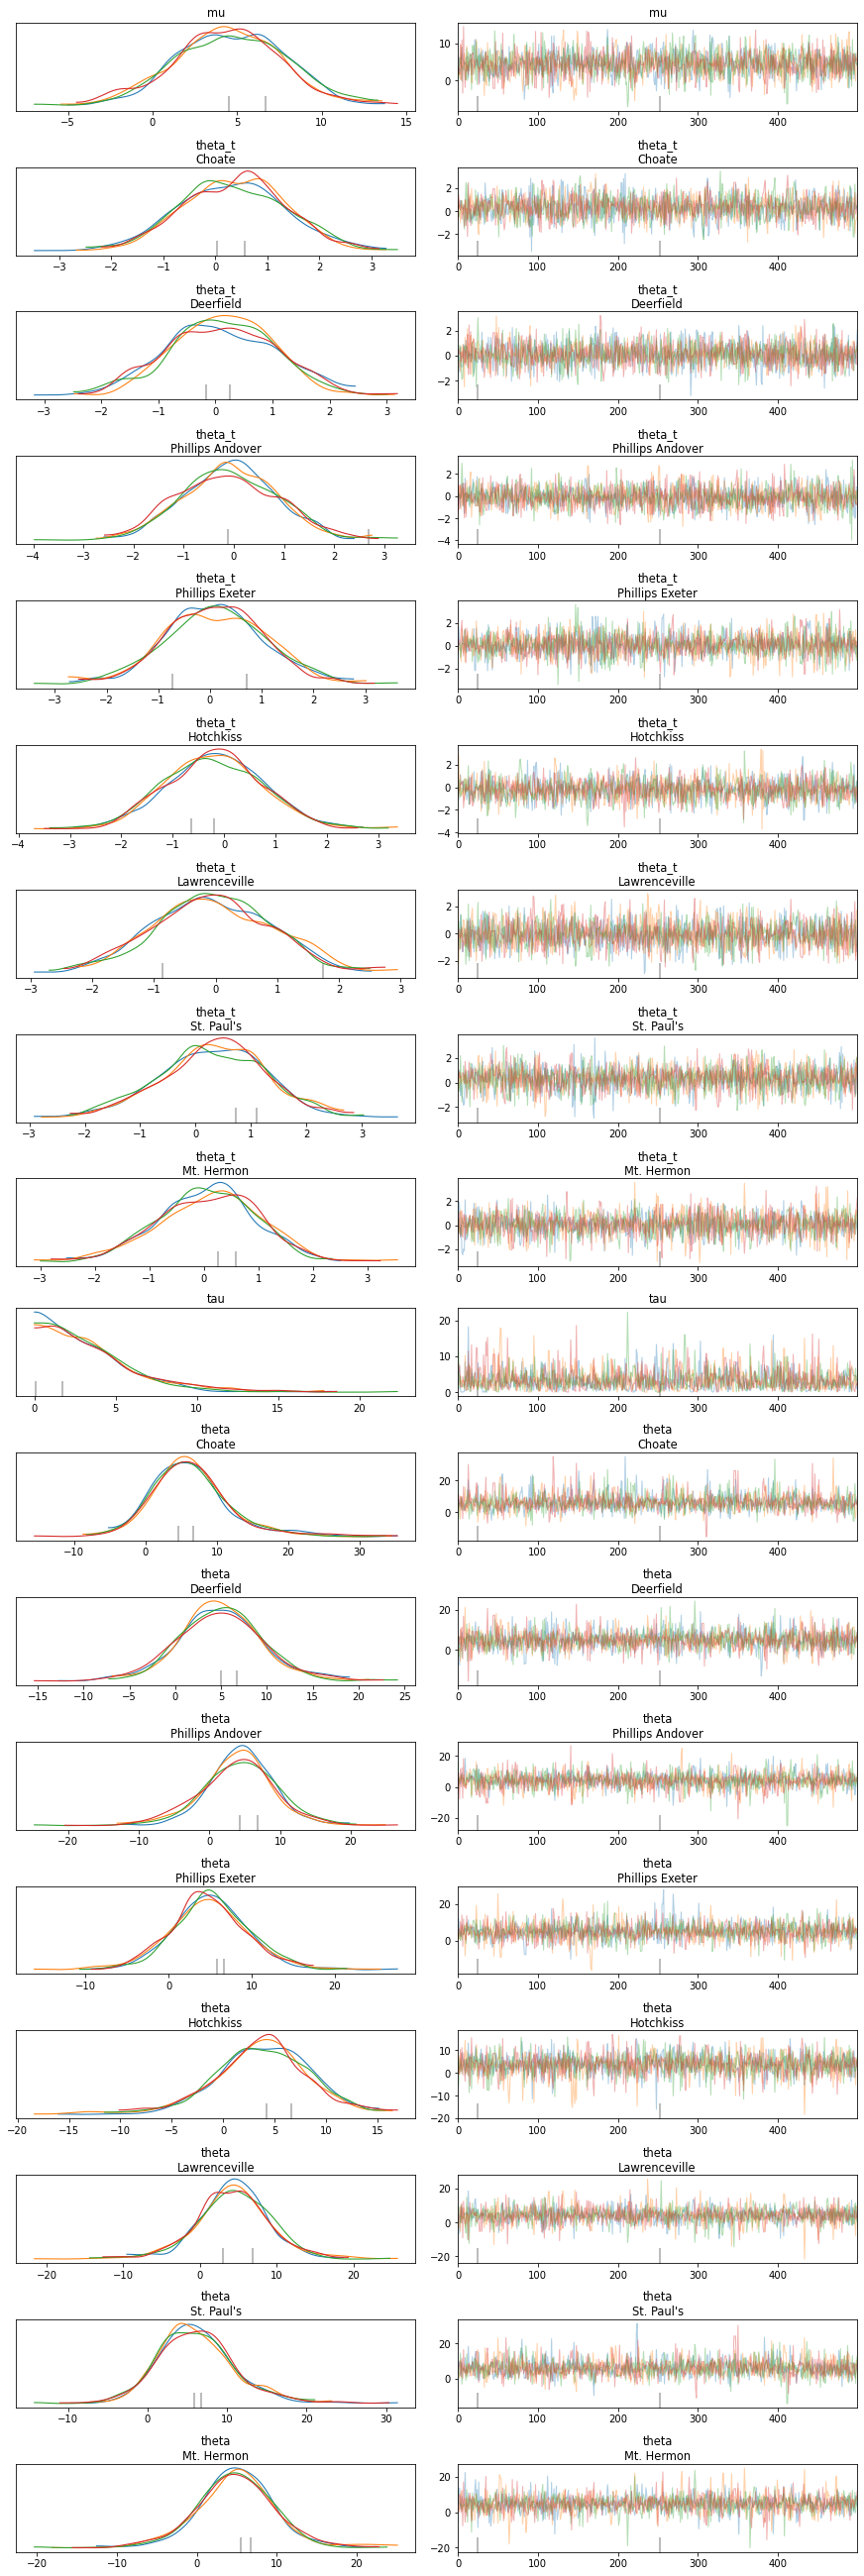

In [8]:
az.plot_trace(idata);